# Lineární regrese

### Import knihoven

In [2]:
import numpy as np
import pandas as pd
import os

### Načtení dat

In [3]:
datapath = os.path.join("datasets", "01")

In [4]:
country_stats = pd.read_csv(os.path.join(datapath, "gdp_satisfaction.csv"))

In [5]:
country_stats

,Country,GDP per capita 2015,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1
5,Estonia,17288.083,5.6
6,Greece,18064.288,4.8
7,Portugal,19121.592,5.1
8,Slovenia,20732.482,5.7
9,Spain,25864.721,6.5


### Vizualizace dat

In [6]:
import matplotlib.pyplot as plt

Jednoduše skrz Pandas DataFrame objekt

<AxesSubplot:xlabel='GDP per capita 2015', ylabel='Life satisfaction'>

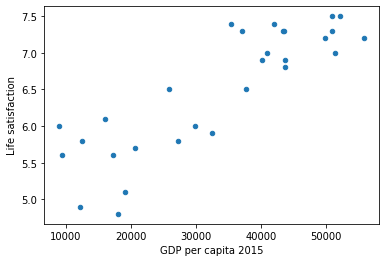

In [8]:
country_stats.plot(kind='scatter', x="GDP per capita 2015", y='Life satisfaction')

Nebo ručně skrz matplotlib

In [9]:
X = country_stats["GDP per capita 2015"].to_numpy()
y = country_stats["Life satisfaction"].to_numpy()

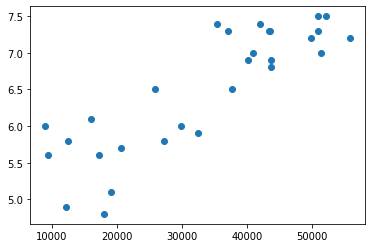

In [12]:
plt.plot(X, y, marker='o', ls='')

### Vytvoření a natrénování modelu

In [13]:
import sklearn.linear_model

Potřebujeme z 1D pole ve tvaru [příznaky] udělat 2D pole ve tvaru [příklady, příznaky]

In [14]:
X

array([ 9054.914,  9437.372, 12239.894, 12495.334, 15991.736, 17288.083,
       18064.288, 19121.592, 20732.482, 25864.721, 27195.197, 29866.581,
       32485.545, 35343.336, 37044.891, 37675.006, 40106.632, 40996.511,
       41973.988, 43331.961, 43603.115, 43724.031, 43770.688, 49866.266,
       50854.583, 50961.865, 51350.744, 52114.165, 55805.204])

In [15]:
X_train = X.reshape(-1,1)
X_train

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [16]:
model = sklearn.linear_model.LinearRegression()

model.fit(X_train, y)

LinearRegression()

### Prohlédneme si výsledek modelu

y = ax + b

In [17]:
b, a = model.intercept_, model.coef_[0]

In [18]:
b, a

(4.853052800266436, 4.911544589158484e-05)

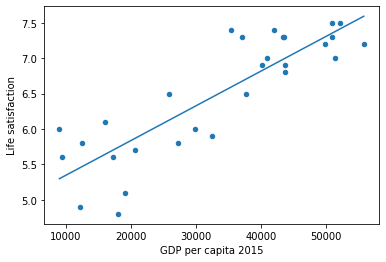

In [19]:
country_stats.plot(kind='scatter', x="GDP per capita 2015", y='Life satisfaction')
plt.plot(X, a*X + b)

### Zkusíme predikovat Life satisfaction např. pro Česko

In [ ]:
czech_gdp = 17715 # https://www.google.com/search?q=czech+republic+gdp+per+caipta+2015

In [ ]:
czech_life_satisfaction = model.predict([[czech_gdp]])[0]
czech_life_satisfaction

Ještě si to prohlédneme v grafu

In [ ]:
country_stats.plot(kind='scatter', x="GDP per capita 2015", y='Life satisfaction')
plt.plot(X, a*X + b)
plt.plot([czech_gdp, czech_gdp], [0, czech_life_satisfaction], "r--")
plt.text(25000, 5.0, "Prediction = {0:.2f}".format(czech_life_satisfaction), fontsize=14, color="b")
plt.plot(czech_gdp, czech_life_satisfaction, "ro")
plt.axis(ymin=0)
plt.show()


In [ ]:
score = model.score(X_train, y)
print("Score: {0:.2f}".format(score))

### Zkusíme modely s více parametry (polynomické modely) - zjevný overfitting

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.metrics import mean_squared_error

degrees = [2,3,5,8,13,21,34]

X_axis = np.linspace(0,60000,1000)
np.seterr(all='ignore')


for degree in degrees:
    poly = preprocessing.PolynomialFeatures(degree=degree, include_bias=False)
    scaler = preprocessing.StandardScaler()
    model = sklearn.linear_model.LinearRegression()
    
    pipe = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', model)])
    pipe.fit(X_train, y)    
    
    mse = mean_squared_error(y, pipe.predict(X_train))
    rmse = np.sqrt(mse)
    
    curve = pipe.predict(X_axis[:, np.newaxis])
    
    score = pipe.score(X_train, y)
    print("N={1}, Score: {0:.2f}, RMSE: {2:.2f}".format(score, degree, rmse))
    
    country_stats.plot(kind='scatter', x="GDP per capita 2015", y='Life satisfaction')
    plt.axis(ymin=0, ymax=10)
    plt.plot(X_axis, curve)
    plt.show()  
    

### Rozdělíme dataset na trénovací a testovací data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

### Opět zkusíme modely s více parametry

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.metrics import mean_squared_error

degrees = [2,3,5,8,13,21,34]

X_axis = np.linspace(0,60000,1000)
np.seterr(all='ignore')


for degree in degrees:
    poly = preprocessing.PolynomialFeatures(degree=degree, include_bias=False)
    scaler = preprocessing.StandardScaler()
    model = sklearn.linear_model.LinearRegression()
    
    pipe = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', model)])
    pipe.fit(X_train, y_train)    
    
    mse = mean_squared_error(y_test, pipe.predict(X_test))
    rmse = np.sqrt(mse)
    
    curve = pipe.predict(X_axis[:, np.newaxis])
    
    
    mse = mean_squared_error(y_train, pipe.predict(X_train))
    rmse = np.sqrt(mse)
    score = pipe.score(X_train, y_train)
    print("Trénovací:\tN={1}\tScore: {0:.2f}\tRMSE: {2:.2f}".format(score, degree, rmse))
        
    mse = mean_squared_error(y_test, pipe.predict(X_test))
    rmse = np.sqrt(mse)
    score = pipe.score(X_test, y_test)
    print("Testovací:\tN={1}\tScore: {0:.2f}\tRMSE: {2:.2f}".format(score, degree, rmse))
    
    country_stats.plot(kind='scatter', x="GDP per capita 2015", y='Life satisfaction')
    plt.axis(ymin=0, ymax=10)
    plt.plot(X_axis, curve)
    plt.plot(X_test, y_test, "ro")
    
    for point_x, point_y in zip(X_test, y_test):
        plt.plot([point_x[0], point_x[0]], [point_y, pipe.predict(point_x.reshape(-1,1))[0]], "r--")
        
    
    plt.show()  